In [3]:
import pandas as pd

In [2]:
df = pd.read_csv("Dataset-Pure/train.csv/train.csv", sep='|')

In [4]:
dfP = pd.read_csv("Dataset-Pure/predict-case.csv/predict-case.csv", sep='|')

In [4]:
dfP["experience_level"].replace("Lebih dari 20 Tahun",15,inplace=True, regex=True)

In [5]:
dfP.describe(include="O")

,job_title,location,salary_currency,career_level,experience_level,education_level,employment_type,job_function,job_benefits,company_process_time,company_size,company_industry,job_description
count,3000,3000,3000,3000,2751,3000,3000,3000,2251,1953,2520,2900,3000
unique,2224,130,1,5,13,15,8,67,826,30,7,56,2688
top,Sales Executive,Jakarta Raya,IDR,Pegawai (non-manajemen & non-supervisor),1 tahun,Sarjana (S1),Penuh Waktu,"Penjualan / Pemasaran,Penjualan Ritel","Asuransi kesehatan;Waktu regular, Senin - Juma...",29 days,1- 50 pekerja,Manufaktur/Produksi,Kualifikasi:Berpenampilan Menarik & RapihBisa ...
freq,52,602,3000,1782,988,840,2552,335,150,345,925,253,16


In [6]:
df['education_level'].describe()

count            31746
unique              21
top       Sarjana (S1)
freq             10340
Name: education_level, dtype: object

In [7]:
df.dropna(axis=0,subset=["salary"],inplace=True)

In [8]:
df["experience_level"].fillna("0 tahun",inplace=True)

def getnum(st):
    num = [int(s) for s in st.split() if s.isdigit()]
    return num[0]

df["experience_level"] = df["experience_level"].apply(getnum)

In [9]:
df

,id,job_title,location,salary_currency,career_level,experience_level,education_level,employment_type,job_function,job_benefits,company_process_time,company_size,company_industry,job_description,salary
5,6,KEPALA PABRIK,Balikpapan,IDR,Supervisor/Koordinator,0,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Manufaktur,Manufaktur",Asuransi kesehatan;Bisnis (contoh: Kemeja);Pro...,18 days,51 - 200 pekerja,Manufaktur/Produksi,"Tedmond Groups membuka Lowongan Kepala Pabrik,...",10500000.0
9,10,Tax Supervisor,Banten,IDR,Supervisor/Koordinator,3,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Akuntansi / Keuangan,Audit & Pajak","Tip;Asuransi kesehatan;Waktu regular, Senin - ...",22 days,51 - 200 pekerja,Konstruksi/Bangunan/Teknik,ResponsibilitiesPrepare corporate income tax (...,8000000.0
18,19,Accounting Staff,Jakarta Pusat,IDR,Pegawai (non-manajemen & non-supervisor),1,"SMA, SMU/SMK/STM, Sertifikat Professional, D3 ...",Penuh Waktu,"Akuntansi / Keuangan,Akuntansi Umum / Pembiayaan",Tip;Asuransi kesehatan;Bisnis (contoh: Kemeja)...,NaN,1- 50 pekerja,Manufaktur/Produksi,DESKRIPSI PEKERJAAN:Memeriksa dan/atau membuat...,4750000.0
22,23,Senior Staff Purchasing,Surabaya,IDR,Pegawai (non-manajemen & non-supervisor),2,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Manufaktur,Pembelian/Manajemen Material",Asuransi kesehatan;Jam Bekerja yang Panjang;Bi...,29 days,1- 50 pekerja,Elektrikal & Elektronik,Deskripsi Pekerjaan:Mampu melakukan rencana pe...,5250000.0
26,27,MARKETING COMMUNICATION & CHANNEL MANAGER,Jakarta Pusat,IDR,Manajer/Asisten Manajer,2,Tidak terspesifikasi,Penuh Waktu,"Penjualan / Pemasaran,Pemasaran/Pengembangan B...",Asuransi Gigi;Asuransi kesehatan;Parkir;Waktu ...,29 days,51 - 200 pekerja,"Konsultasi (IT, Ilmu Pengetahuan, Teknis & Tek...","SCOPE OF ROLE :To plan, develop, implement and...",15000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31719,31720,Sales - Bandung,Bandung,IDR,Pegawai (non-manajemen & non-supervisor),1,"SMA, SMU/SMK/STM, Sertifikat Professional, D3 ...",Penuh Waktu,"Penjualan / Pemasaran,Penjualan Ritel",Asuransi kesehatan;Jam Bekerja yang Panjang;Bi...,20 days,1- 50 pekerja,Retail/Merchandise,Tanggung Jawab :Menjaga dan meningkatkan volum...,5100000.0
31720,31721,CREW OUTLET,Bekasi,IDR,Pegawai (non-manajemen & non-supervisor),0,"SMA, SMU/SMK/STM",Penuh Waktu,"Hotel/Restoran,Makanan/Minuman/Pelayanan Restoran",NaN,NaN,NaN,Makanan & Minuman/Katering/Restoran,PT . Waroeng Steak Indonesia membuka lowongan ...,2400000.0
31729,31730,Flutter Developer Programmer,Aceh,IDR,Pegawai (non-manajemen & non-supervisor),5,"SMA, SMU/SMK/STM, Sertifikat Professional, D3 ...",Penuh Waktu,"Komputer/Teknologi Informasi,IT-Perangkat Lunak",NaN,NaN,1- 50 pekerja,Makanan & Minuman/Katering/Restoran,Flutter Developer1. Menguasai SDK Flutter dan ...,7700000.0
31732,31733,Area Business Development Associate - Madiun,Madiun,IDR,Supervisor/Koordinator,1,"SMA, SMU/SMK/STM, Sertifikat Professional, D3 ...",Penuh Waktu,"Penjualan / Pemasaran,Penjualan Ritel",Kasual (contoh: Kaos),21 days,51 - 200 pekerja,Komputer/Teknik Informatika (Perangkat Keras),SummaryAs an Area Business Development Associa...,8000000.0


In [10]:
missing_val_count_by_column = (df.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

job_benefits            1533
company_process_time    2148
company_size             944
company_industry         192
dtype: int64


In [11]:
df["experience_level"].dtype

dtype('int64')

In [12]:
df['job_benefits'].fillna("0",inplace=True)

def getmany(st):
    a = st.count(";")
    return a

df['job_benefits'] = df["job_benefits"].apply(getmany)

In [13]:
df

,id,job_title,location,salary_currency,career_level,experience_level,education_level,employment_type,job_function,job_benefits,company_process_time,company_size,company_industry,job_description,salary
5,6,KEPALA PABRIK,Balikpapan,IDR,Supervisor/Koordinator,0,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Manufaktur,Manufaktur",3,18 days,51 - 200 pekerja,Manufaktur/Produksi,"Tedmond Groups membuka Lowongan Kepala Pabrik,...",10500000.0
9,10,Tax Supervisor,Banten,IDR,Supervisor/Koordinator,3,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Akuntansi / Keuangan,Audit & Pajak",4,22 days,51 - 200 pekerja,Konstruksi/Bangunan/Teknik,ResponsibilitiesPrepare corporate income tax (...,8000000.0
18,19,Accounting Staff,Jakarta Pusat,IDR,Pegawai (non-manajemen & non-supervisor),1,"SMA, SMU/SMK/STM, Sertifikat Professional, D3 ...",Penuh Waktu,"Akuntansi / Keuangan,Akuntansi Umum / Pembiayaan",3,NaN,1- 50 pekerja,Manufaktur/Produksi,DESKRIPSI PEKERJAAN:Memeriksa dan/atau membuat...,4750000.0
22,23,Senior Staff Purchasing,Surabaya,IDR,Pegawai (non-manajemen & non-supervisor),2,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Manufaktur,Pembelian/Manajemen Material",2,29 days,1- 50 pekerja,Elektrikal & Elektronik,Deskripsi Pekerjaan:Mampu melakukan rencana pe...,5250000.0
26,27,MARKETING COMMUNICATION & CHANNEL MANAGER,Jakarta Pusat,IDR,Manajer/Asisten Manajer,2,Tidak terspesifikasi,Penuh Waktu,"Penjualan / Pemasaran,Pemasaran/Pengembangan B...",4,29 days,51 - 200 pekerja,"Konsultasi (IT, Ilmu Pengetahuan, Teknis & Tek...","SCOPE OF ROLE :To plan, develop, implement and...",15000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31719,31720,Sales - Bandung,Bandung,IDR,Pegawai (non-manajemen & non-supervisor),1,"SMA, SMU/SMK/STM, Sertifikat Professional, D3 ...",Penuh Waktu,"Penjualan / Pemasaran,Penjualan Ritel",2,20 days,1- 50 pekerja,Retail/Merchandise,Tanggung Jawab :Menjaga dan meningkatkan volum...,5100000.0
31720,31721,CREW OUTLET,Bekasi,IDR,Pegawai (non-manajemen & non-supervisor),0,"SMA, SMU/SMK/STM",Penuh Waktu,"Hotel/Restoran,Makanan/Minuman/Pelayanan Restoran",0,NaN,NaN,Makanan & Minuman/Katering/Restoran,PT . Waroeng Steak Indonesia membuka lowongan ...,2400000.0
31729,31730,Flutter Developer Programmer,Aceh,IDR,Pegawai (non-manajemen & non-supervisor),5,"SMA, SMU/SMK/STM, Sertifikat Professional, D3 ...",Penuh Waktu,"Komputer/Teknologi Informasi,IT-Perangkat Lunak",0,NaN,1- 50 pekerja,Makanan & Minuman/Katering/Restoran,Flutter Developer1. Menguasai SDK Flutter dan ...,7700000.0
31732,31733,Area Business Development Associate - Madiun,Madiun,IDR,Supervisor/Koordinator,1,"SMA, SMU/SMK/STM, Sertifikat Professional, D3 ...",Penuh Waktu,"Penjualan / Pemasaran,Penjualan Ritel",0,21 days,51 - 200 pekerja,Komputer/Teknik Informatika (Perangkat Keras),SummaryAs an Area Business Development Associa...,8000000.0


In [14]:
import seaborn as sb
import matplotlib.pyplot as plt

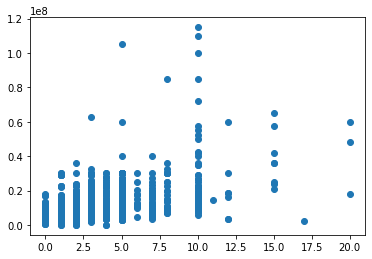

In [15]:
plt.scatter(x=df["experience_level"],y=df["salary"])

In [16]:
missing_val_count_by_column = (df.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

company_process_time    2148
company_size             944
company_industry         192
dtype: int64


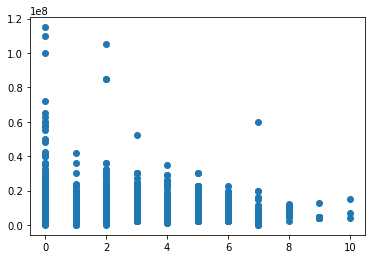

In [17]:
plt.scatter(x=df["job_benefits"],y=df["salary"])

In [18]:
df['company_size'].fillna("0 - 0",inplace=True)

def getmany(st):
    num = [int(s) for s in st.split() if s.isdigit()]
    return num[-1]

df['company_size'] = df["company_size"].apply(getmany)

In [19]:
df['company_process_time'].fillna("0 hari",inplace=True)

def getmany(st):
    num = [int(s) for s in st.split() if s.isdigit()]
    return num[-1]

df['company_process_time'] = df["company_process_time"].apply(getmany)

In [20]:
df

,id,job_title,location,salary_currency,career_level,experience_level,education_level,employment_type,job_function,job_benefits,company_process_time,company_size,company_industry,job_description,salary
5,6,KEPALA PABRIK,Balikpapan,IDR,Supervisor/Koordinator,0,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Manufaktur,Manufaktur",3,18,200,Manufaktur/Produksi,"Tedmond Groups membuka Lowongan Kepala Pabrik,...",10500000.0
9,10,Tax Supervisor,Banten,IDR,Supervisor/Koordinator,3,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Akuntansi / Keuangan,Audit & Pajak",4,22,200,Konstruksi/Bangunan/Teknik,ResponsibilitiesPrepare corporate income tax (...,8000000.0
18,19,Accounting Staff,Jakarta Pusat,IDR,Pegawai (non-manajemen & non-supervisor),1,"SMA, SMU/SMK/STM, Sertifikat Professional, D3 ...",Penuh Waktu,"Akuntansi / Keuangan,Akuntansi Umum / Pembiayaan",3,0,50,Manufaktur/Produksi,DESKRIPSI PEKERJAAN:Memeriksa dan/atau membuat...,4750000.0
22,23,Senior Staff Purchasing,Surabaya,IDR,Pegawai (non-manajemen & non-supervisor),2,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Manufaktur,Pembelian/Manajemen Material",2,29,50,Elektrikal & Elektronik,Deskripsi Pekerjaan:Mampu melakukan rencana pe...,5250000.0
26,27,MARKETING COMMUNICATION & CHANNEL MANAGER,Jakarta Pusat,IDR,Manajer/Asisten Manajer,2,Tidak terspesifikasi,Penuh Waktu,"Penjualan / Pemasaran,Pemasaran/Pengembangan B...",4,29,200,"Konsultasi (IT, Ilmu Pengetahuan, Teknis & Tek...","SCOPE OF ROLE :To plan, develop, implement and...",15000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31719,31720,Sales - Bandung,Bandung,IDR,Pegawai (non-manajemen & non-supervisor),1,"SMA, SMU/SMK/STM, Sertifikat Professional, D3 ...",Penuh Waktu,"Penjualan / Pemasaran,Penjualan Ritel",2,20,50,Retail/Merchandise,Tanggung Jawab :Menjaga dan meningkatkan volum...,5100000.0
31720,31721,CREW OUTLET,Bekasi,IDR,Pegawai (non-manajemen & non-supervisor),0,"SMA, SMU/SMK/STM",Penuh Waktu,"Hotel/Restoran,Makanan/Minuman/Pelayanan Restoran",0,0,0,Makanan & Minuman/Katering/Restoran,PT . Waroeng Steak Indonesia membuka lowongan ...,2400000.0
31729,31730,Flutter Developer Programmer,Aceh,IDR,Pegawai (non-manajemen & non-supervisor),5,"SMA, SMU/SMK/STM, Sertifikat Professional, D3 ...",Penuh Waktu,"Komputer/Teknologi Informasi,IT-Perangkat Lunak",0,0,50,Makanan & Minuman/Katering/Restoran,Flutter Developer1. Menguasai SDK Flutter dan ...,7700000.0
31732,31733,Area Business Development Associate - Madiun,Madiun,IDR,Supervisor/Koordinator,1,"SMA, SMU/SMK/STM, Sertifikat Professional, D3 ...",Penuh Waktu,"Penjualan / Pemasaran,Penjualan Ritel",0,21,200,Komputer/Teknik Informatika (Perangkat Keras),SummaryAs an Area Business Development Associa...,8000000.0


In [21]:
# plt.scatter(x=df["company_size"],y=df["salary"])

In [22]:
# import seaborn as sns
# sns.pairplot(df)

In [23]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
#because all column used are object, we dont need :
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

df[object_cols] = ordinal_encoder.fit_transform(df[object_cols])

df.fillna(0,inplace=True)

In [24]:
# import seaborn as sns
# sns.pairplot(df)

In [25]:
# corrmat = df.corr()
# top_corr_features = corrmat.index
# plt.figure(figsize=(10,10))

# g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [26]:
feature = ["location", "salary_currency", "career_level","experience_level","education_level","employment_type","job_function","job_benefits","company_process_time", "company_industry","company_size"]
x = df[feature]
y = df["salary"]
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.3, random_state=0)

import xgboost as xgb
from scipy.stats import uniform, randint

In [27]:
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state = 0)

In [28]:

params = {
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(3, 10), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}


In [29]:
from sklearn.model_selection import RandomizedSearchCV

xgb = RandomizedSearchCV(estimator = xgb_model, param_distributions = params,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [30]:
xgb.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[09:23:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=5, n_estimators=107, subsample=0.8394633936788146; total time=   0.1s
[09:23:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=5, n_estimators=107, subsample=0.8394633936788146; total time=   0.1s
[09:23:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=5, n_estimators=107, subsamp

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen obje

In [31]:
xgb.best_params_

{'gamma': 0.34015376929388985,
 'learning_rate': 0.16514977559086289,
 'max_depth': 4,
 'n_estimators': 103,
 'subsample': 0.9768807022739411}

In [32]:
xgb.best_score_

-10218126759793.61

In [33]:
predictions=xgb.predict(x_valid)

In [34]:
from sklearn import metrics
import numpy as np

print('MAE:', metrics.mean_absolute_error(y_valid, predictions))
print('MSE:', metrics.mean_squared_error(y_valid, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, predictions)))

MAE: 1838608.312139297
MSE: 16935703457980.406
RMSE: 4115301.1381890886


In [35]:
# #data preparation
# import pandas as pd

# train_path = "Dataset-Pure/train.csv/train.csv"

# train = pd.read_csv(train_path, sep = '|')

# trainC = train.dropna(axis=0,subset=["salary"])

# x_cols_used = ["location","salary_currency","career_level","experience_level","education_level","employment_type","job_function","company_industry","company_size"]

# x = trainC[x_cols_used]
# y = trainC["salary"]

# from sklearn.model_selection import train_test_split
# x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.3, random_state=0)

# #data proccessing
# from sklearn.preprocessing import OrdinalEncoder
# ordinal_encoder = OrdinalEncoder(categories="auto",unknown_value=165, handle_unknown="use_encoded_value")
# #because all column used are object, we dont need :
# # s = (x_train.dtypes == 'object')
# # object_cols = list(s[s].index)

# x_train[x_cols_used] = ordinal_encoder.fit_transform(x_train[x_cols_used])
# x_valid[x_cols_used] = ordinal_encoder.transform(x_valid[x_cols_used])
# x_train.fillna(0,inplace=True)
# x_valid.fillna(0,inplace=True)

# #make model

# from sklearn.ensemble import RandomForestRegressor

# model = RandomForestRegressor()
# model.fit(x_train,y_train)
# predictions = model.predict(x_valid)

# from sklearn import metrics
# import numpy as np

# print('MAE:', metrics.mean_absolute_error(y_valid, predictions))
# print('MSE:', metrics.mean_squared_error(y_valid, predictions))
# print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, predictions)))


In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
rfregressor = RandomForestRegressor()



In [37]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [38]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [39]:
rfgs=RandomizedSearchCV(estimator = rfregressor, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [40]:
rfgs.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [41]:
rfgs.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [42]:
predictions = rfgs.predict(x_valid)

from sklearn import metrics
import numpy as np

print('MAE:', metrics.mean_absolute_error(y_valid, predictions))
print('MSE:', metrics.mean_squared_error(y_valid, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, predictions)))

MAE: 1691574.844353197
MSE: 16038024624972.793
RMSE: 4004750.2575033056


In [43]:
#data preparation
import pandas as pd

train_path = "Dataset-Pure/train.csv/train.csv"

train = pd.read_csv(train_path, sep = '|')

trainC = train.dropna(axis=0,subset=["salary"])

x_cols_used = ["location","salary_currency","career_level","experience_level","education_level","employment_type","job_function","company_industry","company_size"]

x = trainC[x_cols_used]
y = trainC["salary"]

from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.3, random_state=0)

#data proccessing
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories="auto",unknown_value=165, handle_unknown="use_encoded_value")
#because all column used are object, we dont need :
# s = (x_train.dtypes == 'object')
# object_cols = list(s[s].index)

x_train[x_cols_used] = ordinal_encoder.fit_transform(x_train[x_cols_used])
x_valid[x_cols_used] = ordinal_encoder.transform(x_valid[x_cols_used])
x_train.fillna(0,inplace=True)
x_valid.fillna(0,inplace=True)

#make model

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train,y_train)
predictions = model.predict(x_valid)

from sklearn import metrics
import numpy as np

print('MAE:', metrics.mean_absolute_error(y_valid, predictions))
print('MSE:', metrics.mean_squared_error(y_valid, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, predictions)))


MAE: 1845223.2136970612
MSE: 18120878955544.332
RMSE: 4256862.571841418


In [44]:
df.describe(include="O")

ValueError: No objects to concatenate

In [7]:
#data preparation

import pandas as pd
import numpy as np

train_path = "Dataset-Pure/train.csv/train.csv"
predict_path = "Dataset-Pure/predict-case.csv/predict-case.csv"

train = pd.read_csv(train_path,sep="|")
predicts = pd.read_csv(predict_path,sep="|")

from sklearn.impute import SimpleImputer

feature = ["location", "salary_currency", "career_level","experience_level","education_level","employment_type","job_function","job_benefits","company_process_time", "company_industry","company_size"]

simpan = train["salary"].copy()

train=train[feature]
predict= predicts[feature]
tcop = train.copy()
pcop = predict.copy()
# Imputation
my_imputer = SimpleImputer(strategy = "most_frequent")
train = pd.DataFrame(my_imputer.fit_transform(train))
predict = pd.DataFrame(my_imputer.transform(predict))

# Imputation removed column names; put them back
train.columns = tcop.columns
predict.columns = pcop.columns

train["salary"] = simpan

def getnum(st):
    num = [int(s) for s in st.split() if s.isdigit()]
    return num[0]

train["experience_level"].fillna("0 tahun",inplace=True)
train["experience_level"] = train["experience_level"].apply(getnum)

predict["experience_level"].fillna("0 tahun",inplace=True)
predict["experience_level"] = predict["experience_level"].apply(getnum)

def getmany(st):
    a = st.count(";")
    return a

train['job_benefits'].fillna("0",inplace=True)
train['job_benefits'] = train["job_benefits"].apply(getmany)

predict['job_benefits'].fillna("0",inplace=True)
predict['job_benefits'] = predict["job_benefits"].apply(getmany)


def getmany(st):
    a = st.count(",")
    return a

train['education_level'].fillna("0",inplace=True)
train['education_level'] = train["education_level"].apply(getmany)

predict['education_level'].fillna("0",inplace=True)
predict['education_level'] = predict["education_level"].apply(getmany)


def getback(st):
    num = [int(s) for s in st.split() if s.isdigit()]
    return num[-1]

train['company_size'].fillna("0 - 0",inplace=True)
train['company_size'] = train["company_size"].apply(getback)

train['company_process_time'].fillna("0 hari",inplace=True)
train['company_process_time'] = train["company_process_time"].apply(getback)

predict['company_size'].fillna("0 - 0",inplace=True)
predict['company_size'] = predict["company_size"].apply(getback)

predict['company_process_time'].fillna("0 hari",inplace=True)
predict['company_process_time'] = predict["company_process_time"].apply(getback)

from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories='auto',unknown_value=200,handle_unknown ="use_encoded_value")

s = (train.dtypes == 'object')
object_cols = list(s[s].index)

train[object_cols] = ordinal_encoder.fit_transform(train[object_cols])
predict[object_cols] = ordinal_encoder.transform(predict[object_cols])

train.dropna(axis=0, subset=["salary"],inplace=True)

x_train = train[feature]
y_train = train["salary"]

x_p = predict[feature]

from sklearn.model_selection import train_test_split
x_train, x_p, y_train, y_p = train_test_split(x_train, y_train, test_size=0.3, random_state=0)

import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.ensemble import AdaBoostRegressor

xgb_model = AdaBoostRegressor(random_state = 0)

params = {
    "learning_rate": [0.5,1,2,3,4],
    "n_estimators" : [25,50,100,200,300,500,700, 1000]
}

from sklearn.model_selection import RandomizedSearchCV

xgb = RandomizedSearchCV(estimator = xgb_model, param_distributions = params,scoring='neg_mean_squared_error', n_iter = 25, cv = 5, verbose=2, random_state=42, n_jobs = 1)

xgb.fit(x_train, y_train)
print(xgb.best_params_)
predictions=xgb.predict(x_p)
from sklearn import metrics
import numpy as np

print('MAE:', metrics.mean_absolute_error(y_p, predictions))
print('MSE:', metrics.mean_squared_error(y_p, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_p, predictions)))

# output = pd.DataFrame({'id': predicts.id,
#                        'salary': predictions})
# output.to_csv('Submission4/submission4.csv', index=False)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END ..................learning_rate=2, n_estimators=200; total time=   0.0s
[CV] END ..................learning_rate=2, n_estimators=200; total time=   0.0s
[CV] END ..................learning_rate=2, n_estimators=200; total time=   0.0s
[CV] END ..................learning_rate=2, n_estimators=200; total time=   0.4s
[CV] END ..................learning_rate=2, n_estimators=200; total time=   0.0s
[CV] END ...................learning_rate=2, n_estimators=25; total time=   0.0s
[CV] END ...................learning_rate=2, n_estimators=25; total time=   0.0s
[CV] END ...................learning_rate=2, n_estimators=25; total time=   0.0s
[CV] END ...................learning_rate=2, n_estimators=25; total time=   0.0s
[CV] END ...................learning_rate=2, n_estimators=25; total time=   0.0s
[CV] END .................learning_rate=1, n_estimators=1000; total time=   0.0s
[CV] END .................learning_rate=1, n_es